In [2]:
import wave
wav_obj=wave.open('trimmed/machineGun/4 (4).wav','rb')


In [3]:
sample_freq=wav_obj.getframerate()
sample_freq

48000

In [4]:
n_samples=wav_obj.getnframes()
n_samples

48000

In [5]:
t_audio=n_samples/sample_freq
t_audio

1.0

In [6]:
n_channels=wav_obj.getnchannels()
n_channels

2

In [7]:
signal_wave=wav_obj.readframes(n_samples)

In [8]:
import numpy as np
signal_array=np.frombuffer(signal_wave,dtype=np.int16)
signal_array.shape

(96000,)

In [9]:
l_channel=signal_array[0::2]
r_channel=signal_array[1::2]

In [10]:
r_channel.shape

(48000,)

In [11]:
times = np.linspace(0, n_samples/sample_freq, num=n_samples)

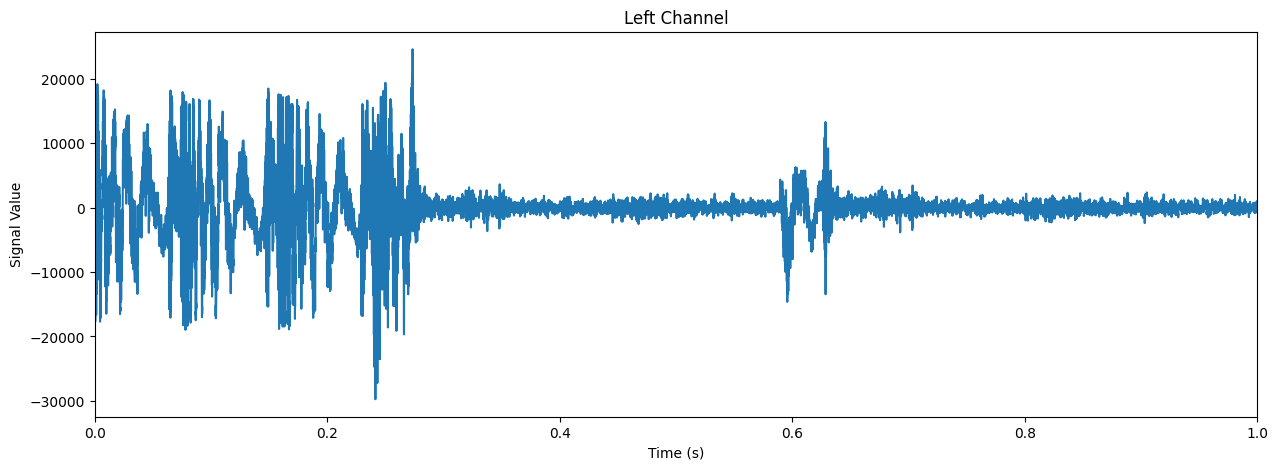

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(times, l_channel)
plt.title('Left Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

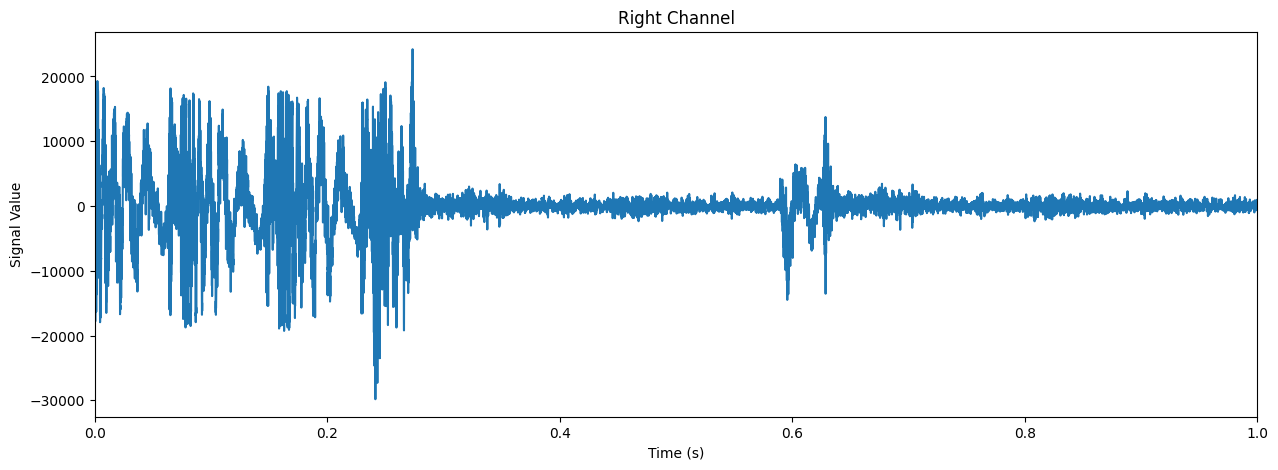

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(times, r_channel)
plt.title('Right Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

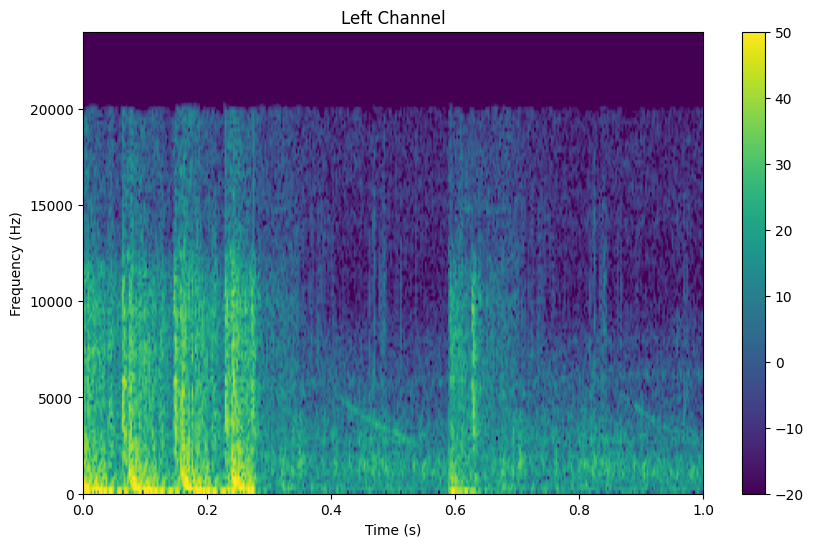

In [14]:
plt.figure(figsize=(10, 6))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

In [15]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [19]:
import plotly.graph_objs as go
import librosa
audio_file = 'trimmed/MachineGun/4 (4).wav'
y, sr = librosa.load(audio_file)

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=sr/2)

# Convert to decibel (dB) units
S_dB = librosa.power_to_db(S, ref=np.max)

# Create the time and frequency axes
time = np.linspace(0, len(y) / sr, S.shape[1])
mel_frequencies = librosa.mel_frequencies(n_mels=S.shape[0], fmin=0, fmax=sr/2)

# Create the heatmap for the spectrogram
heatmap = go.Heatmap(
    z=S_dB,
    x=time,
    y=mel_frequencies,
    colorscale='Viridis',  # You can change the color scale
    colorbar=dict(title='dB'),
    hovertemplate="Time: %{x:.2f} sec<br>Frequency: %{y:.2f} Hz<br>Intensity: %{z:.2f} dB<extra></extra>"
)

# Layout settings for the interactive plot
layout = go.Layout(
    title='Interactive Mel Spectrogram',
    xaxis=dict(title='Time (seconds)'),
    yaxis=dict(title='Frequency (Hz)', type='linear'),
    width=800,
    height=600,
)

# Generate the plot with plotly
fig = go.Figure(data=[heatmap], layout=layout)
fig.show()